# Driving on a Mobius Strip

AutomotiveDrivingModels is templated to efficiently run different types of simulations.
Entities are parameterized by their:

- *S* state, which changes over time
- *D* defintion, which does not change over time
- *I* id, typically an `Int`, which uniquely identifies that entity.

In addition to these types, the actions, environment and the driver models can also be parameterized.

This notebook demonstrates a longitudinal driving simulation where cars drive on a single straight lane that loops back on itself.
The types are:

- *S* - `State1D`, containing the position and speed
- *D* - `VehicleDef`, containing length, width, and class
- *I* - `Int`

We use a `StraightRoadway` as our environment and `LaneFollowingDriver`s that produce `LaneFollowingAccel`s.


In [1]:
using AutomotiveDrivingModels
using AutoViz

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\AutomotiveDrivingModels\ZEfHM.ji for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
└ @ Base loading.jl:1184
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
│   exception = ErrorException("Required dependency Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] failed to load from a cache file.")
└ @ Base loading.jl:969
┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\AutoViz\w0rHu.ji for AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1184
┌ Warning: Module AutomotiveDrivingModels with build ID 614701268831930 is missing from the cache.
│ This may mean AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Recompiling stale cache file C:\User

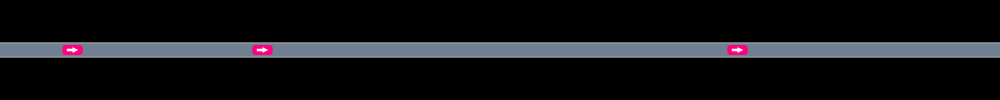

In [2]:
road_length = 200.0 # [meters]
roadway = StraightRoadway(road_length)

scene = Scene1D()
push!(scene, Entity(State1D(10.0,  8.0), VehicleDef(), 1))
push!(scene, Entity(State1D(50.0, 12.5), VehicleDef(), 2))
push!(scene, Entity(State1D(150.0, 6.0), VehicleDef(), 3))

cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)

We can add an overlay that displays the car id for convenience:

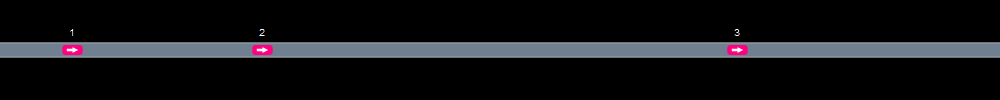

In [3]:
overlays = [TextOverlay(text=["$(veh.id)"], incameraframe=true, pos=VecE2(veh.state.s-0.7, 3)) for veh in scene]
render(scene, roadway, overlays, cam=cam, canvas_height=100)

Or we can create a new `SceneOverlay` which does this for us:

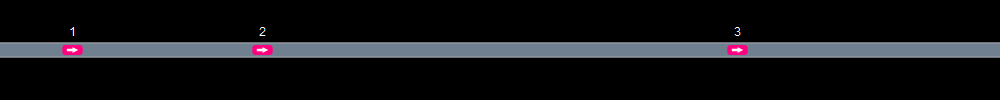

In [4]:
using Parameters
@with_kw struct CarIDOverlay <: SceneOverlay
    textparams::TextParams=TextParams()
end
function AutoViz.render!(rendermodel::RenderModel, overlay::CarIDOverlay, scene::Scene1D, roadway::StraightRoadway)
    for veh in scene
        x = veh.state.s - 0.7
        y = 3.0
        text = string(veh.id)
        add_instruction!(rendermodel, render_text, (text, x, y, overlay.textparams.size, overlay.textparams.color), incameraframe=true)
    end
    return rendermodel
end

render(scene, roadway, [CarIDOverlay()], cam=cam, canvas_height=100)

To run a simulation we need driving models that produce actions.
For this we will use `LaneFollowingDriver`s that produce `LaneFollowingAccel`s.
We will give each car a different model, as a demonstration.

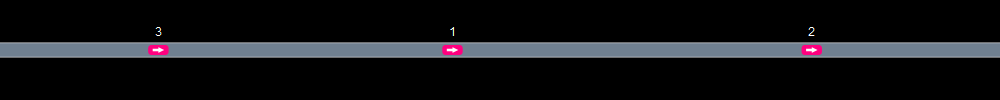

In [5]:
models = Dict{Int, LaneFollowingDriver}()
models[1] = StaticLaneFollowingDriver(0.0) # always produce zero acceleration
models[2] = IntelligentDriverModel(v_des=12.0) # default IDM with a desired speed of 12 m/s
models[3] = PrincetonDriver(v_des = 10.0) # default Princeton driver with a desired speed of 10m/s

nticks = 100
timestep = 0.1
rec = QueueRecord(Vehicle1D, nticks+1, timestep)
simulate!(LaneFollowingAccel, rec, scene, roadway, models, nticks)
render(rec[0], roadway, [CarIDOverlay()], cam=cam, canvas_height=100)

We can use Interact to inspect the simulation.

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\Interact\XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for CSSUtil [70588ee8-6100-5070-97c1-3cb50ed05fe8]
│   exception = Required dependency WebIO [0f1e0344-ec1d-5b48-a673-e5cf874b6c29] failed to load from a cache file.
└ @ Base loading.jl:969
┌ Warning: Module WebIO with build ID 614782226586775 is missing from the cache.
│ This may mean WebIO [0f1e0344-ec1d-5b48-a673-e5cf874b6c29] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module WebIO with build ID 614782226586775 is missing from the cache.
│ This may mean WebIO [0f1e0344-ec1d-5b48-a673-e5cf874b6c29] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: The call to compilecache failed to create a usable precompiled cache fi

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"value: indexString, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"indexString"=>(Observable{String} with 1 listeners. Value:
"51", nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\all.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\style.css", "C:\\Users\\Maxime\\.julia\\packages\\Interact\\Fs3lV\\src\\..\\assets\\bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"95\",\"96\",\"97\",\"98\",\"99\",\"100\",\"101\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"indexString\":WebIO.getval({\"name\":\"indexString\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":
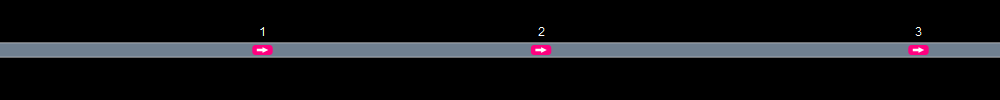
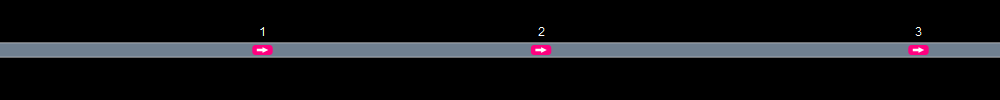

In [6]:
using Interact
@manipulate for frame_index in 1 : nframes(rec)
    render(rec[frame_index-nframes(rec)], roadway, [CarIDOverlay()], cam=cam, canvas_height=100)
end